In [1]:
pip install wordcloud

     |████████████████████████████████| 220 kB 226 kB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp37-cp37m-macosx_10_9_x86_64.whl size=158529 sha256=0f3d31dbabe7b58c4721c016b6262b2f59fe168d9872c1a14aef58f0e66de654
  Stored in directory: /Users/soumilhooda/Library/Caches/pip/wheels/f8/f6/55/6bd394c32a844a621ca0fe5dbf563c8d71d71edaf095656991
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


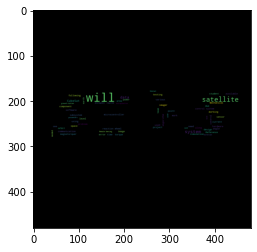

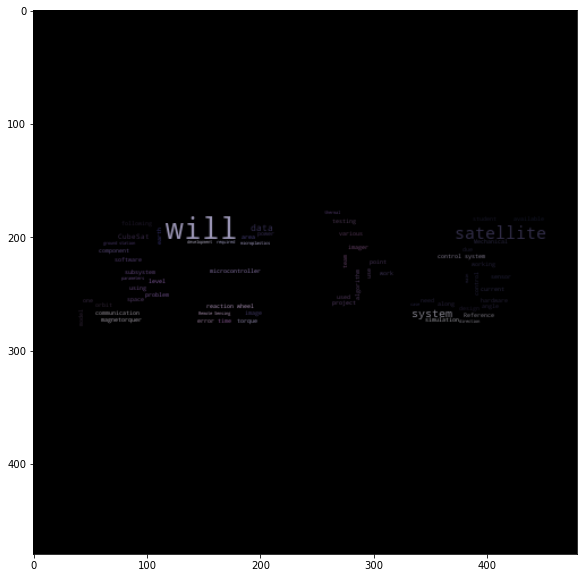

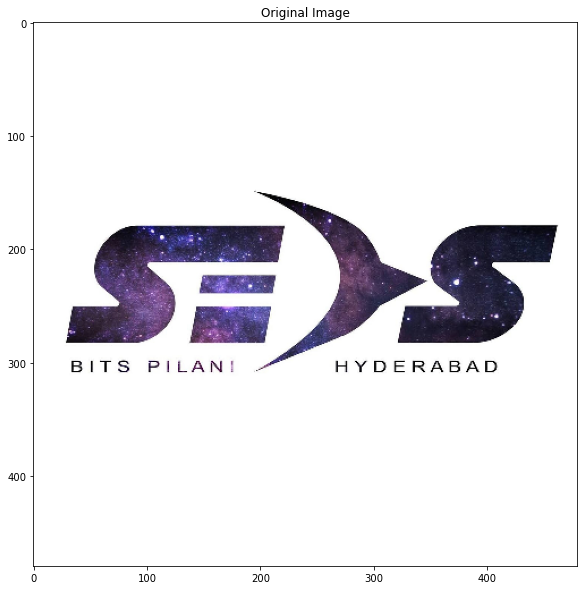

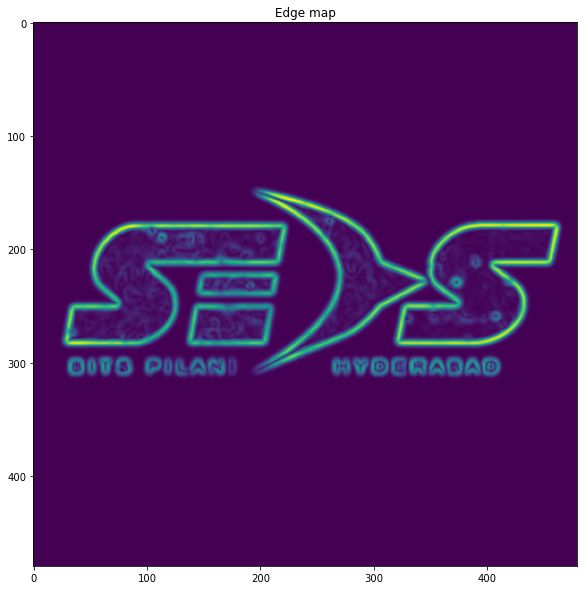

In [1]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator


d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()


text = open(os.path.join(d, '/Users/soumilhooda/Desktop/CubeSat_NEMOlite_Report__March_2022_.txt'), encoding="utf-8").read()


logo_color = np.array(Image.open(os.path.join(d, "/Users/soumilhooda/Desktop/sedsbphc.jpeg")))

logo_color = logo_color[::3, ::3]

logo_mask = logo_color.copy()
logo_mask[logo_mask.sum(axis=2) == 0] = 255


edges = np.mean([gaussian_gradient_magnitude(logo_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
logo_mask[edges > .08] = 255


wc = WordCloud(max_words=200, mask=logo_mask, max_font_size=40, random_state=42, relative_scaling=1)


wc.generate(text)
plt.imshow(wc)


image_colors = ImageColorGenerator(logo_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("logo_new.png")
plt.savefig('logo_new.png')

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(logo_color)
plt.savefig('logo_color.png')

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.savefig('logo_edges.png')
plt.show()